# Pooling, Padding, and ReLU — Understanding CNN Transformations


## Step 1: Setting Up the PyTorch Environment


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# For displaying results
def display_image(image, title=""):
    # Ensure a new plot for each image to prevent overlaps
    plt.figure()
    # Display the image in grayscale
    plt.imshow(image, cmap='gray')
    plt.title(title)
    # Turn off axis numbers and ticks for a cleaner image display
    plt.axis('off')
    plt.show()

## Step 2: Implementing Pooling Layers


Original Image Tensor for Pooling:
 tensor([[[[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])
Pooled Output:
 tensor([[[[ 6.,  8.],
          [14., 16.]]]])


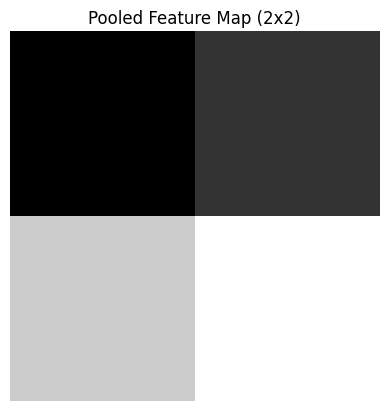

In [ ]:
# Sample image tensor (Batch_size=1, Channels=1, Height=4, Width=4)
image_tensor = torch.tensor([[ 1,  2,  3,  4],
                             [ 5,  6,  7,  8],
                             [ 9, 10, 11, 12],
                             [13, 14, 15, 16]], dtype=torch.float32).view(1, 1, 4, 4)

# Max pooling operation with a 2x2 kernel and stride of 2
pool = nn.MaxPool2d(kernel_size=2, stride=2)
pooled_output = pool(image_tensor)

print("Original Image Tensor for Pooling:\n", image_tensor)
print("Pooled Output:\n", pooled_output)
# Squeeze to remove batch and channel dimensions for display, then convert to NumPy array
display_image(pooled_output.squeeze().numpy(), title="Pooled Feature Map (2x2)")

## Step 3: Exploring Padding Techniques


Original Image Tensor for Padding:
 tensor([[[[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])
Padded Image (with 1 pixel zero-padding on all sides):
 tensor([[[[ 0.,  0.,  0.,  0.,  0.,  0.],
          [ 0.,  1.,  2.,  3.,  4.,  0.],
          [ 0.,  5.,  6.,  7.,  8.,  0.],
          [ 0.,  9., 10., 11., 12.,  0.],
          [ 0., 13., 14., 15., 16.,  0.],
          [ 0.,  0.,  0.,  0.,  0.,  0.]]]])


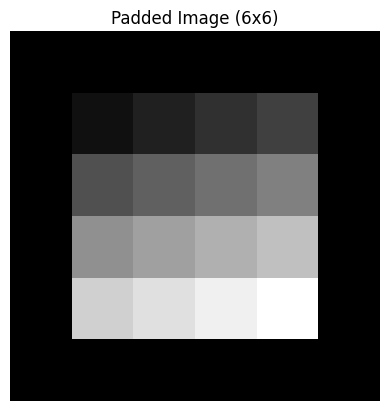

In [ ]:
# Demonstrating padding on the original image_tensor
# nn.ZeroPad2d((pad_left, pad_right, pad_top, pad_bottom))
# Padding with 1 pixel on all sides (left, right, top, bottom)
pad = nn.ZeroPad2d((1, 1, 1, 1))

padded_image = pad(image_tensor)
print("Original Image Tensor for Padding:\n", image_tensor)
print("Padded Image (with 1 pixel zero-padding on all sides):\n", padded_image)
# The padded image will be 6x6
display_image(padded_image.squeeze().numpy(), title="Padded Image (6x6)")

## Step 4: Applying the ReLU Activation Function


Original Tensor for ReLU (with negative values):
 tensor([[[[ -1.0000,   2.5000,  -0.5000,   4.0000],
          [  5.0000,  -6.0000,   0.0000,  -8.0000],
          [ -9.0000,  10.5000, -11.5000,  12.0000],
          [ 13.0000, -14.0000,  15.5000,  -2.0000]]]])


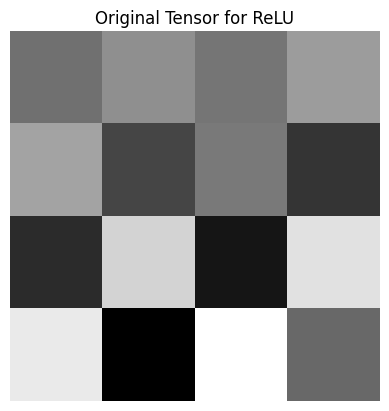

ReLU Activated Output (negatives zeroed out):
 tensor([[[[ 0.0000,  2.5000,  0.0000,  4.0000],
          [ 5.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000, 10.5000,  0.0000, 12.0000],
          [13.0000,  0.0000, 15.5000,  0.0000]]]])


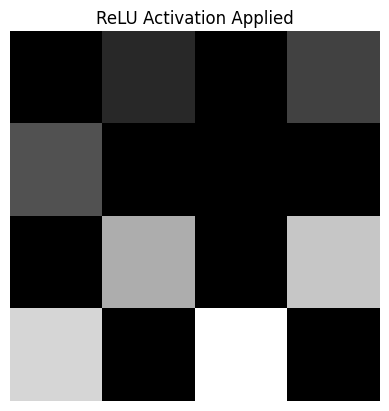

In [ ]:
# Create a sample feature map with a mix of positive and negative values for ReLU demonstration
relu_input_tensor = torch.tensor([[-1.0,  2.5, -0.5,  4.0],
                                  [ 5.0, -6.0,  0.0, -8.0],
                                  [-9.0, 10.5, -11.5, 12.0],
                                  [13.0,-14.0, 15.5, -2.0]], dtype=torch.float32).view(1, 1, 4, 4)

print("Original Tensor for ReLU (with negative values):\n", relu_input_tensor)
display_image(relu_input_tensor.squeeze().numpy(), title="Original Tensor for ReLU")

# Applying ReLU activation
relu_activation_fn = nn.ReLU()
relu_output = relu_activation_fn(relu_input_tensor)

print("ReLU Activated Output (negatives zeroed out):\n", relu_output)
display_image(relu_output.squeeze().numpy(), title="ReLU Activation Applied")

## Step 5: Combining Transformations in a Convolutional Architecture


Original Image Tensor for CNN Layer:
 tensor([[[[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])
CNN Layer Output (after Conv -> Pool -> ReLU):
 tensor([[[[1.4890, 1.6060],
          [3.4043, 2.0739]]]], grad_fn=<ReluBackward0>)


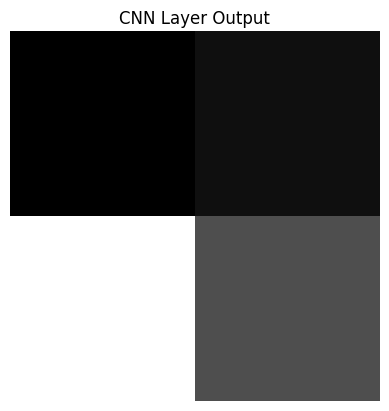

In [ ]:
# Simplified CNN Layer demonstrating convolution, pooling, and ReLU
class CNNLayer(nn.Module):
    def __init__(self):
        super(CNNLayer, self).__init__()
        # Convolutional layer: 1 input channel, 1 output channel, 3x3 kernel, 1 pixel padding
        # Padding=1 with Kernel=3, Stride=1 typically maintains spatial dimensions (for this input)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1)
        # Max pooling layer: 2x2 kernel, stride 2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # ReLU activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Apply convolution
        x = self.conv1(x)
        # Apply pooling
        x = self.pool(x)
        # Apply ReLU activation
        x = self.relu(x)
        return x

# Instantiate and apply the CNN layer using the original image_tensor
# The original image_tensor is used here. Convolution may introduce negative values
# due to its weights, which ReLU will then act upon.
cnn_layer_instance = CNNLayer()
processed_output = cnn_layer_instance(image_tensor)

print("Original Image Tensor for CNN Layer:\n", image_tensor)
print("CNN Layer Output (after Conv -> Pool -> ReLU):\n", processed_output)
# .detach() is used because the output tensor has a computation graph (due to Conv2d weights)
display_image(processed_output.squeeze().detach().numpy(), title="CNN Layer Output")